<a href="https://colab.research.google.com/github/Charlymanuk/Optimizacion_Portuaria/blob/main/Optimizacion_Aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

datos = pd.read_csv("/content/flights.csv")
datos.shape

(71175, 11)

In [3]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [5]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [6]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

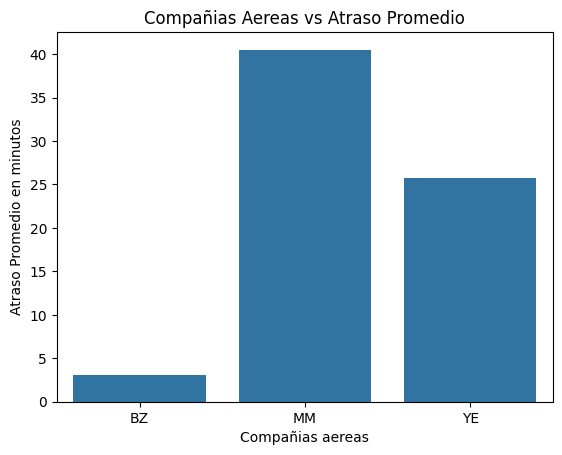

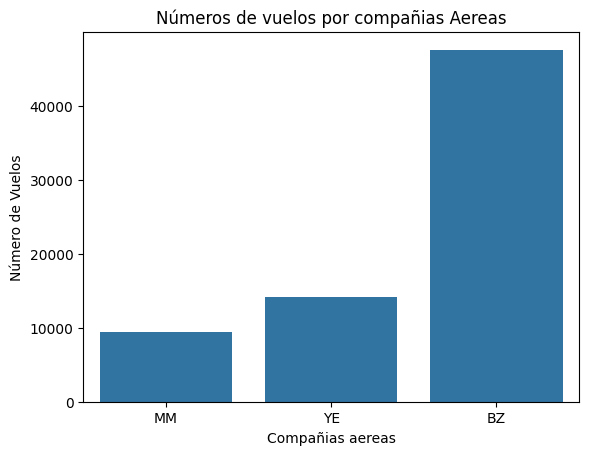

In [8]:
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañias Aereas vs Atraso Promedio')
plt.xlabel('Compañias aereas')
plt.ylabel('Atraso Promedio en minutos')
plt.show()

sns.countplot(x='airline', data=datos)
plt.title('Números de vuelos por compañias Aereas')
plt.xlabel('Compañias aereas')
plt.ylabel('Número de Vuelos')
plt.show()

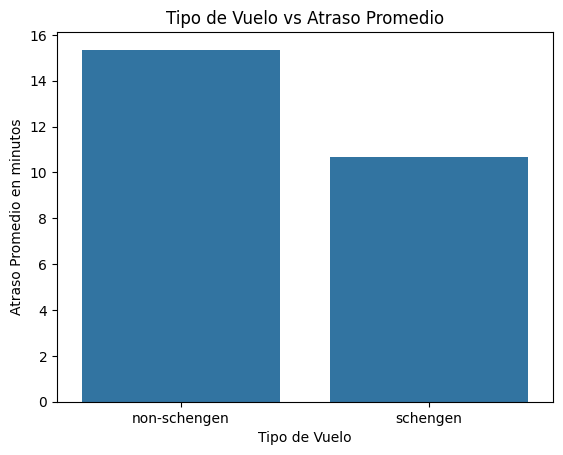

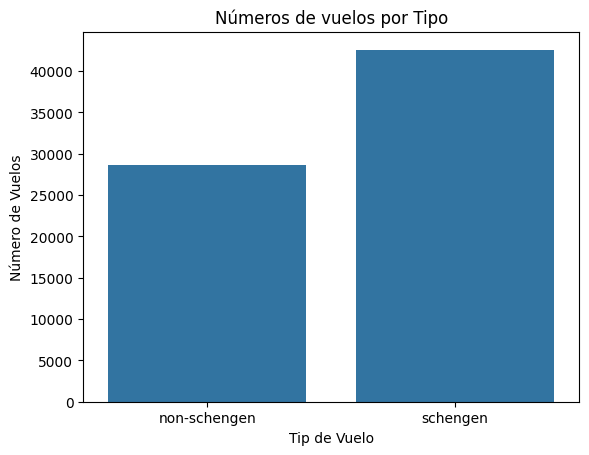

In [9]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de Vuelo vs Atraso Promedio')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Atraso Promedio en minutos')
plt.show()

sns.countplot(x='schengen', data=datos)
plt.title('Números de vuelos por Tipo')
plt.xlabel('Tip de Vuelo')
plt.ylabel('Número de Vuelos')
plt.show()

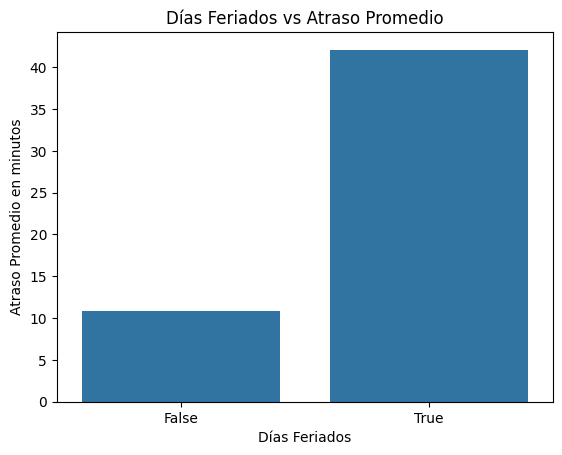

In [10]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Días Feriados vs Atraso Promedio')
plt.xlabel('Días Feriados')
plt.ylabel('Atraso Promedio en minutos')
plt.show()

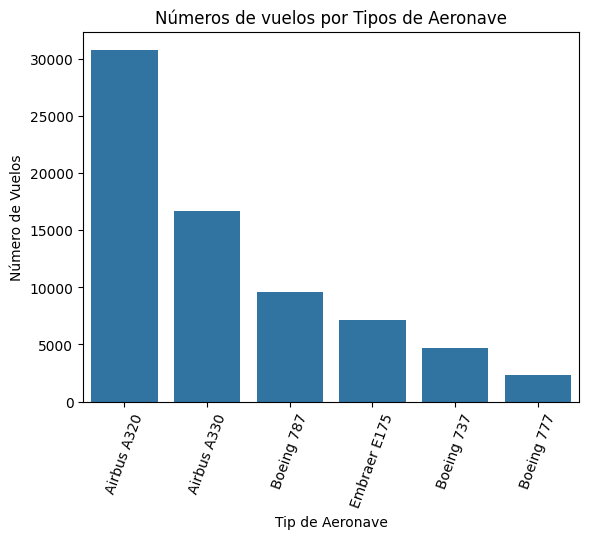

In [11]:
order = datos['aircraft_type'].value_counts().index

sns.countplot(x='aircraft_type', data=datos, order=order)
plt.title('Números de vuelos por Tipos de Aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tip de Aeronave')
plt.ylabel('Número de Vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

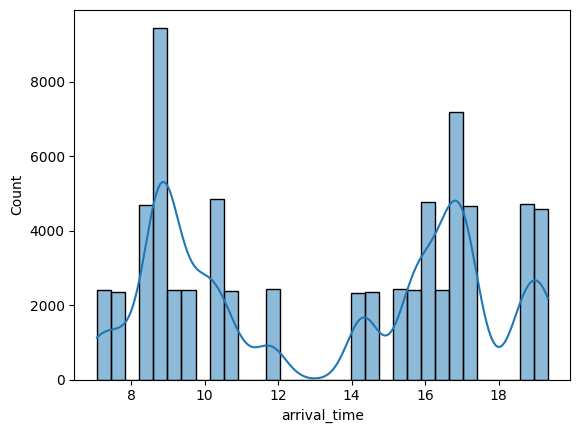

In [15]:
sns.histplot(data=datos,x='arrival_time',kde=True)

In [17]:
import numpy as np

def ancho_bin(df, columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

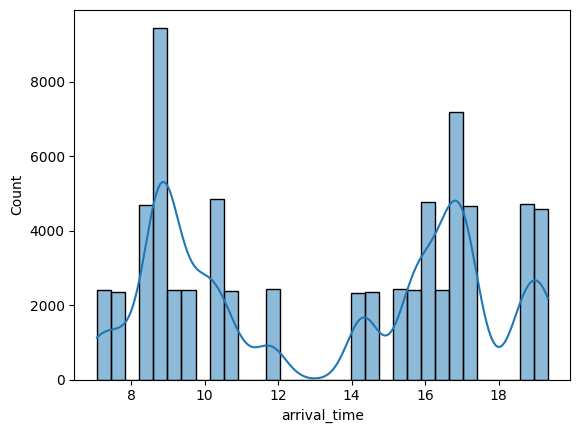

In [18]:
binwidth =ancho_bin(datos,'arrival_time')
sns.histplot(data=datos,x='arrival_time',kde=True, binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

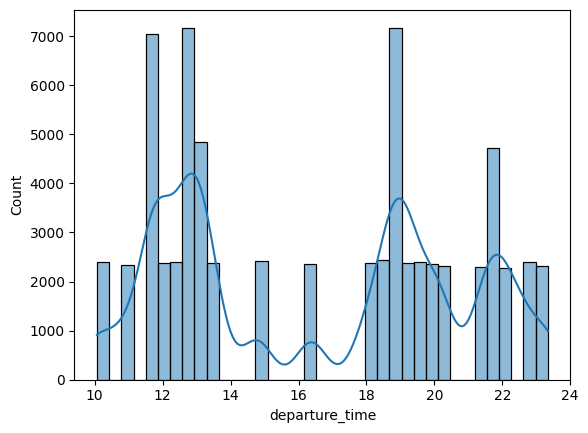

In [27]:
binwidth =ancho_bin(datos,'departure_time')
sns.histplot(data=datos,x='departure_time',kde=True, binwidth=binwidth)

/tmp/ipython-input-874566030.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend()


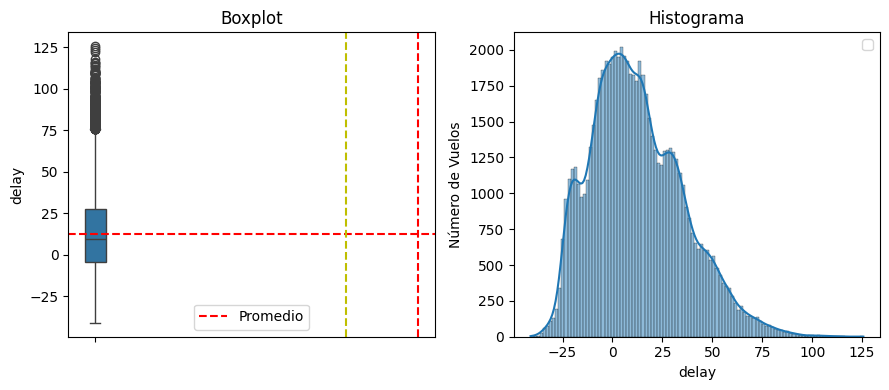

In [36]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig,ax = plt.subplots(1,2, figsize=(9,4))

sns.boxplot(data=datos,y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y= atraso_promedio, color='r', linestyle='--',label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos,'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Número de Vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[0].axvline(x= atraso_promedio, color='r', linestyle='--',label='Promedio')
ax[0].axvline(x= atraso_mediana, color='y', linestyle='--',label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

In [41]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay',
       'date'],
      dtype='object')

In [43]:
datos['date'] = datos['year'].astype(str) +'-'+(datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [44]:
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos ['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
61601,22,YE,Airbus A320,non-schengen,MWL,8.794147,11.794147,91,2021,True,94.596807,2021-04-02,False,Friday
5308,23,YE,Embraer E175,schengen,TCY,18.801235,21.801235,353,2010,False,42.130795,2010-12-20,False,Monday
36563,27,BZ,Airbus A320,schengen,AUZ,14.376052,16.376052,247,2016,False,-10.337502,2016-09-04,True,Sunday
52027,18,BZ,Airbus A320,schengen,TZF,14.258911,20.258911,183,2019,False,3.913473,2019-07-03,False,Wednesday
65505,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,352,2021,False,-1.298505,2021-12-19,True,Sunday


In [46]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [50]:
import warnings

warnings.filterwarnings('ignore')

In [51]:
datos ['schengen'] = datos['schengen'].replace({'non_schengen':0, 'schengen':1})
datos ['is_holiday'] = datos['is_holiday'].replace({False:0, True:1})
datos ['is_weekend'] = datos['is_weekend'].replace({False:0, True:1})
datos.sample(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
5917,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,29,2011,0,21.740527,2011-01-30,1,Sunday
27059,27,BZ,Airbus A320,1,AUZ,14.376052,16.376052,343,2014,0,17.534196,2014-12-10,0,Wednesday


In [53]:
categoricas = ['airline','aircraft_type','origin','day_name']

pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,non-schengen,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,non-schengen,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,non-schengen,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,non-schengen,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
datos_codificados = pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
49292,2,1,19.196804,22.196804,1,2019,0,6.343845,2019-01-02,0,...,0,0,1,0,0,0,0,0,0,1
12211,27,1,14.376052,16.376052,84,2012,0,16.636703,2012-03-25,1,...,0,0,0,0,0,0,1,0,0,0
18479,19,1,16.245220,19.245220,136,2013,0,26.371591,2013-05-17,0,...,0,1,0,1,0,0,0,0,0,0
47630,4,1,11.781391,14.781391,255,2018,0,-21.474092,2018-09-13,0,...,1,0,0,0,0,0,0,1,0,0
69601,8,1,15.729617,18.729617,260,2022,0,3.263406,2022-09-18,1,...,0,0,1,0,0,0,1,0,0,0


In [55]:
datos [['arrival_time','departure_time' ]].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [56]:
df = datos_codificados.drop(columns=['flight_id', 'departure_time','day','year','date'])
df.sample(10)


,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
70437,non-schengen,10.733469,0,-5.064537,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
70302,1,17.313731,0,0.966852,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
43435,1,16.909690,0,7.026061,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
41000,1,18.801235,0,33.325093,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
12947,1,7.065594,0,40.639565,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5693,1,17.033688,0,38.071240,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
25741,non-schengen,15.496519,0,7.411307,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5337,non-schengen,16.718722,0,-4.106723,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
65286,1,17.033688,1,22.429450,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
14436,non-schengen,19.341235,0,6.228944,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


CLASE 3


In [60]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X = df.drop(['delay'], axis=1)
y = df['delay']

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

baseline =  DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_dummy = baseline.predict(X_test)
def calcular_regresion (y_test, y_pred):
  rmse = mean_absolute_error (y_test, y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test,y_pred)
  metricas = {
      'RMSE':round(rmse**(1/2),4),
      'MAE': round (mae,4),
      'R2': round (mae, 4),
  }
  return metricas


In [74]:
resulatados_baseline = calcular_regresion( y_test, y_pred_dummy)
resulatados_baseline

{'RMSE': 4.3087, 'MAE': 18.5646, 'R2': 18.5646}